# 1. 數據集

我們將使用相同的數據集進行討論，涵蓋決策樹 (Decision Tree)、隨機森林 (Random Forests) 和梯度提升樹 (Gradient Boosted Trees) 的分類，以便比較這些相關模型的性能指標。

我們將使用 “Palmer Penguins” 數據集，這個數據集足夠簡單，可以幫助我們完全理解超參數改變如何影響分類結果。

* penguins_size.csv：簡化的數據來自原始企鵝數據集。包含變量：
    * species：企鵝物種（帽帶企鵝、阿德利企鵝或紐帶企鵝）
    * culmen_length_mm：嘴峰長度（毫米）
    * culmen_depth_mm：嘴峰深度（毫米）
    * flipper_length_mm：鰭長度（毫米）
    * body_mass_g：體重（克）
    * island：在 Palmer 群島（南極洲）的島嶼名稱（Dream, Torgersen 或 Biscoe）
    * sex：企鵝性別

**我們的目標是創建一個模型，該模型可以根據物理屬性幫助預測企鵝的物種，然後我們可以使用該模型幫助研究人員在現場分類企鵝，而無需經驗豐富的生物學家。**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [4]:
df = df.dropna() # 移除空值

In [5]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [6]:
df["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [7]:
df = df[df["sex"] != '.'] # 過濾是.的性別

In [8]:
df["sex"].unique()

array(['MALE', 'FEMALE'], dtype=object)

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

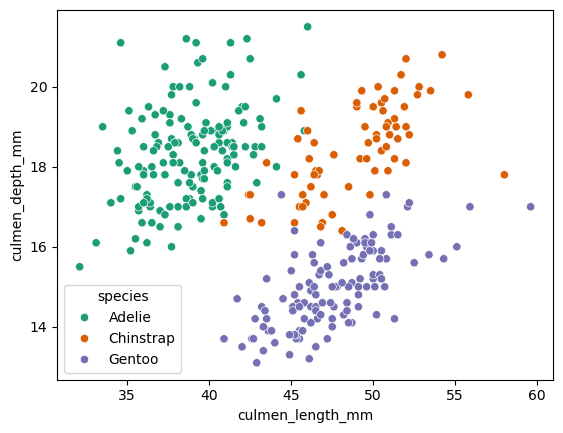

In [9]:
sns.scatterplot(x="culmen_length_mm", y='culmen_depth_mm', data = df, hue="species", palette="Dark2")

In [10]:
X = pd.get_dummies(df.drop('species', axis = 1), drop_first = 1)
y = df['species']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [12]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [13]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
base_pred = model.predict(X_test)

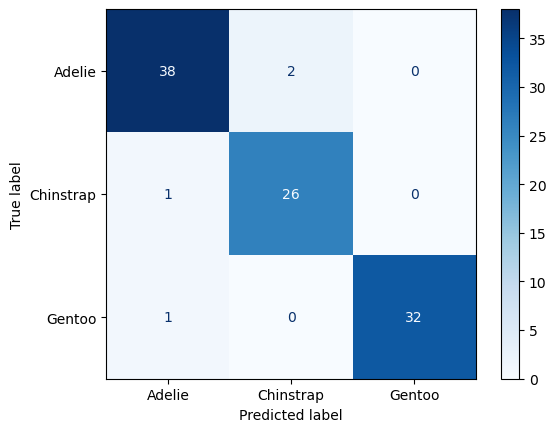

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, base_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
disp.plot(cmap = plt.cm.Blues)
plt.show()

# 2. Visualize the Tree

[Text(0.5416666666666666, 0.9, 'x[2] <= 206.0\ngini = 0.626\nsamples = 233\nvalue = [106, 41, 86]'),
 Text(0.3333333333333333, 0.7, 'x[0] <= 43.35\ngini = 0.4\nsamples = 145\nvalue = [105, 40, 0]'),
 Text(0.4375, 0.8, 'True  '),
 Text(0.16666666666666666, 0.5, 'x[0] <= 42.35\ngini = 0.056\nsamples = 105\nvalue = [102, 3, 0]'),
 Text(0.08333333333333333, 0.3, 'gini = 0.0\nsamples = 97\nvalue = [97, 0, 0]'),
 Text(0.25, 0.3, 'x[2] <= 189.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3, 0]'),
 Text(0.16666666666666666, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(0.5, 0.5, 'x[4] <= 0.5\ngini = 0.139\nsamples = 40\nvalue = [3, 37, 0]'),
 Text(0.4166666666666667, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.5833333333333334, 0.3, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.75, 0.7, 'x[1] <= 17.65\ngini = 0.045\nsamples = 88\nvalue = [1, 1, 86]'),
 Text(0.6458333333333333, 0.8, 

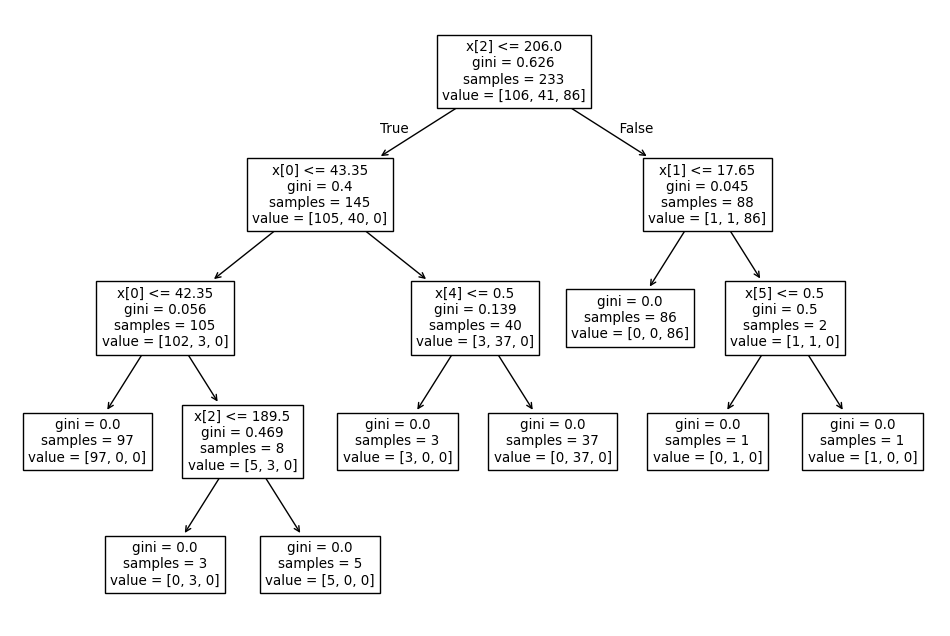

In [16]:
from sklearn.tree import plot_tree
plt.figure(figsize = (12,8))
plot_tree(model)

[Text(0.5416666666666666, 0.9, 'flipper_length_mm <= 206.0\ngini = 0.626\nsamples = 233\nvalue = [106, 41, 86]'),
 Text(0.3333333333333333, 0.7, 'culmen_length_mm <= 43.35\ngini = 0.4\nsamples = 145\nvalue = [105, 40, 0]'),
 Text(0.4375, 0.8, 'True  '),
 Text(0.16666666666666666, 0.5, 'culmen_length_mm <= 42.35\ngini = 0.056\nsamples = 105\nvalue = [102, 3, 0]'),
 Text(0.08333333333333333, 0.3, 'gini = 0.0\nsamples = 97\nvalue = [97, 0, 0]'),
 Text(0.25, 0.3, 'flipper_length_mm <= 189.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3, 0]'),
 Text(0.16666666666666666, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(0.5, 0.5, 'island_Dream <= 0.5\ngini = 0.139\nsamples = 40\nvalue = [3, 37, 0]'),
 Text(0.4166666666666667, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.5833333333333334, 0.3, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.75, 0.7, 'culmen_depth_mm <= 17.65\ngini = 0.045

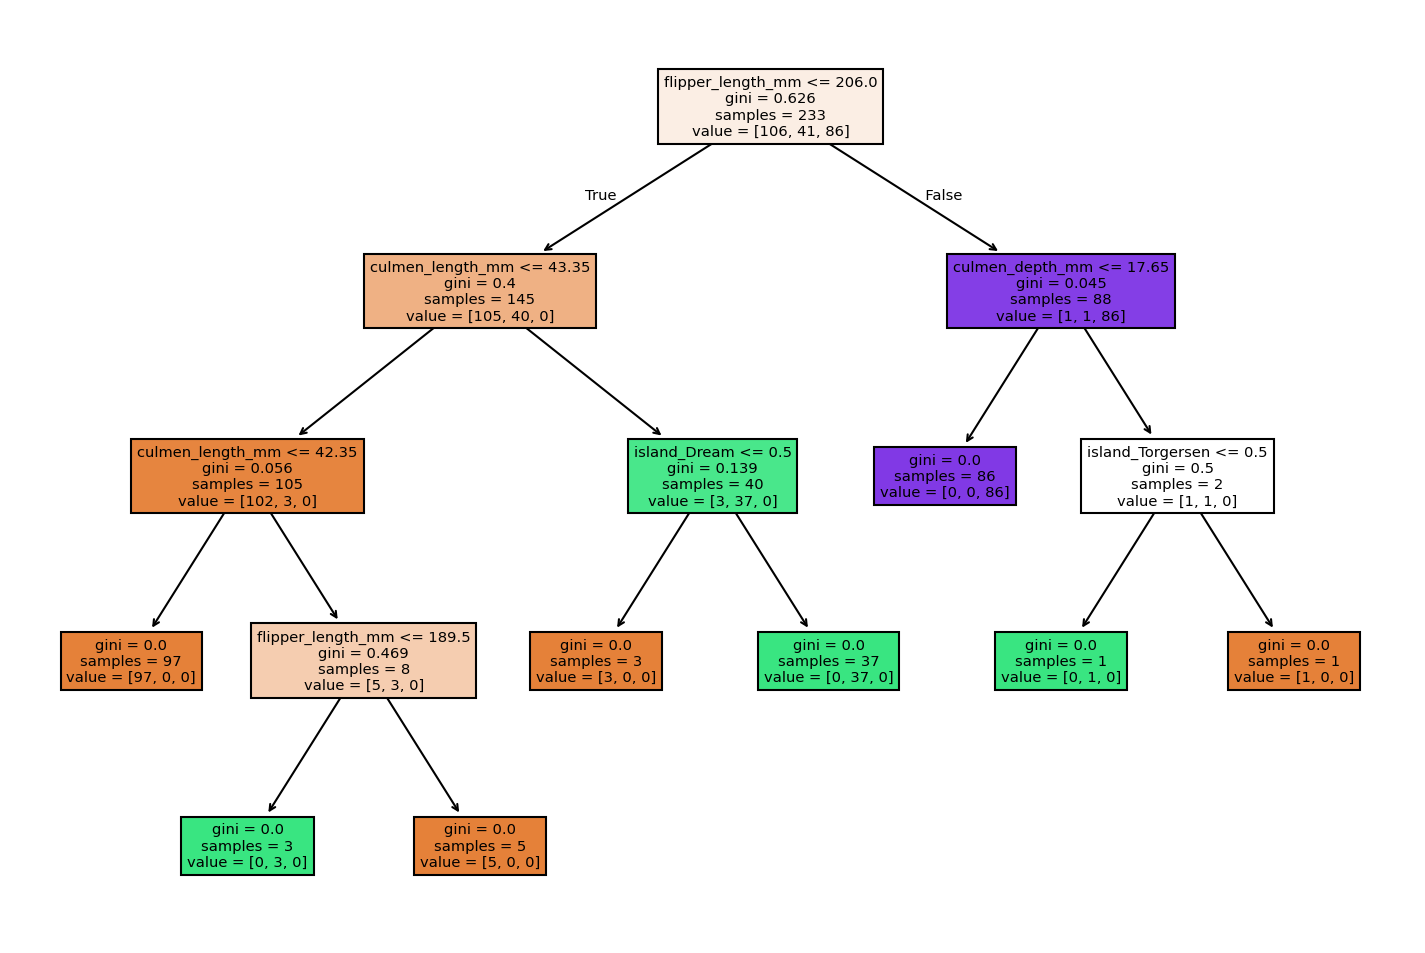

In [17]:
plt.figure(figsize = (12,8), dpi = 150)
plot_tree(model, filled = True, feature_names = X.columns)

In [18]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds))
    print("\n")
    plt.figure(figsize = (12,8), dpi = 150)
    plot_tree(model, filled = True, feature_names = X.columns)

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.93      0.96      0.95        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100





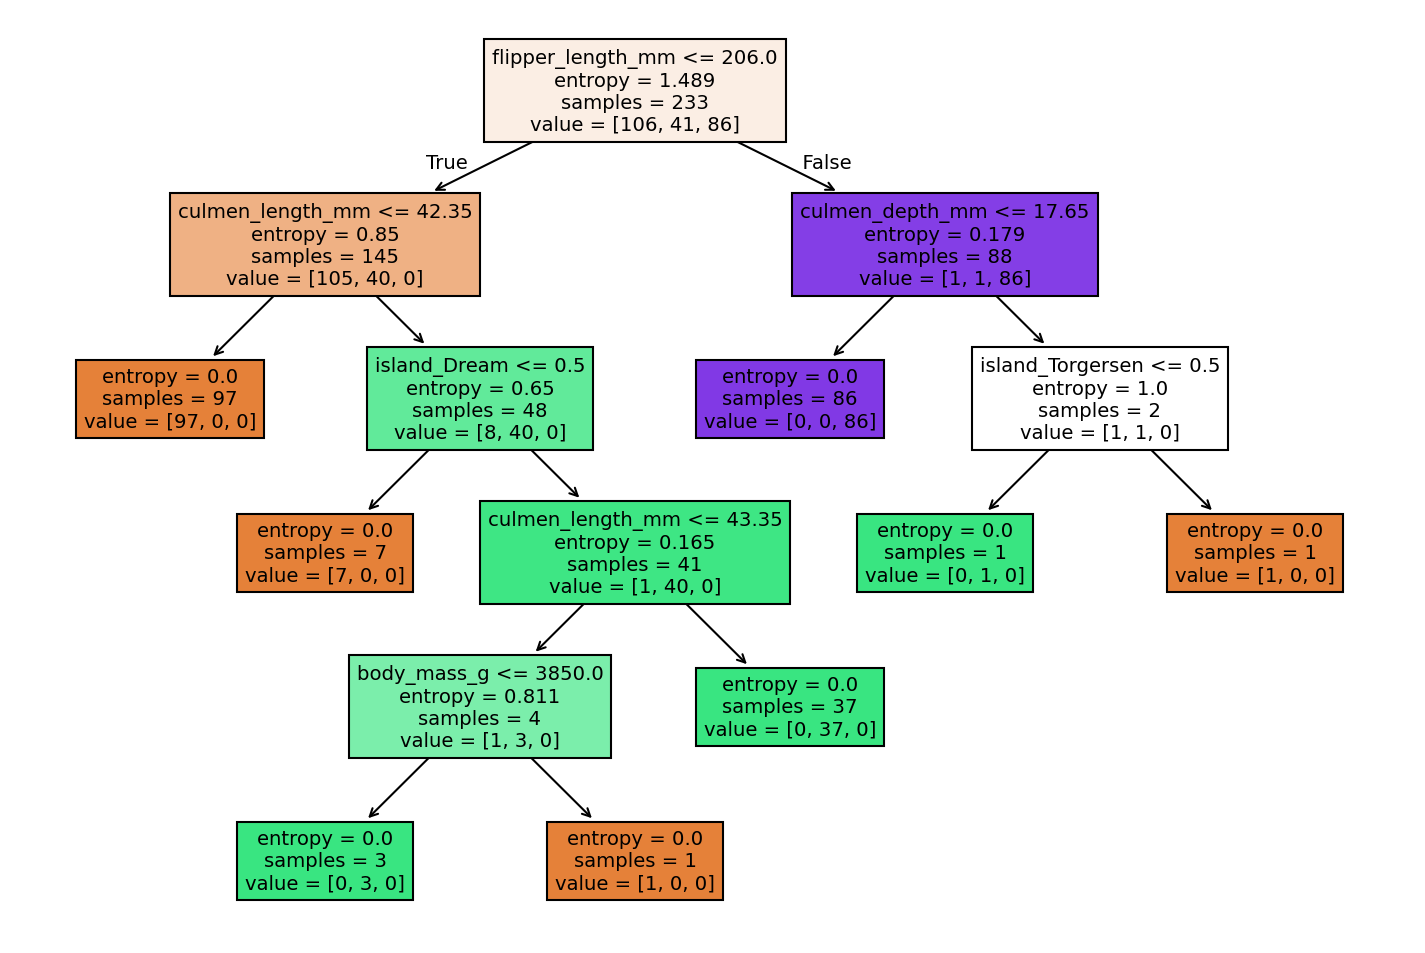

In [19]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train, y_train)
report_model(entropy_tree)

# 3. Random Forest - Classification

### Random Forests (隨機森林)
1. **多個決策樹組成**：
   - 隨機森林由多個決策樹（樹的數量稱為樹的數量）組成，每棵樹獨立生成。
   - 每棵樹只使用訓練數據的一部分（通過Bootstrap隨機抽樣）和隨機選擇的一部分特徵。

2. **集成學習方法**：
   - 隨機森林是一種集成學習方法，通過結合多個決策樹的預測結果來提高模型的準確性和穩定性。
   - 對於分類任務，隨機森林通過投票方式決定最終類別；對於回歸任務，通過平均所有樹的預測結果來獲得最終結果。

3. **抗過擬合能力強**：
   - 隨機森林由於綜合了多棵樹的預測結果，減少了單棵樹過擬合的風險，具有更好的泛化能力。
   - 通過引入隨機性來減少模型的變異性，提高了預測準確性。

### 總結
- **決策樹**適用於需要簡單解釋和快速預測的情況，但容易過擬合。
- **隨機森林**則通過多棵樹的結合，提供了更高的準確性和穩定性，適用於更複雜的問題。

這些差異使得隨機森林在實際應用中更加常用，特別是在需要高準確性和穩定性的任務中。

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("penguins_size.csv")
df = df.dropna()

In [22]:
df = pd.read_csv("penguins_size.csv")
df = df.dropna()
df = df[df["sex"] != '.'] # 過濾是.的性別

In [23]:
X = pd.get_dummies(df.drop("species", axis = 1), drop_first = True)
y = df["species"]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
# 'sqrt' 表示在每個節點處隨機選擇的特徵數量將是總特徵數的平方根
# n_estimators 決策樹的數量
model = RandomForestClassifier(n_estimators = 10, max_features='sqrt', random_state = 101)
model.fit(X_train, y_train)
preds = model.predict(X_test)

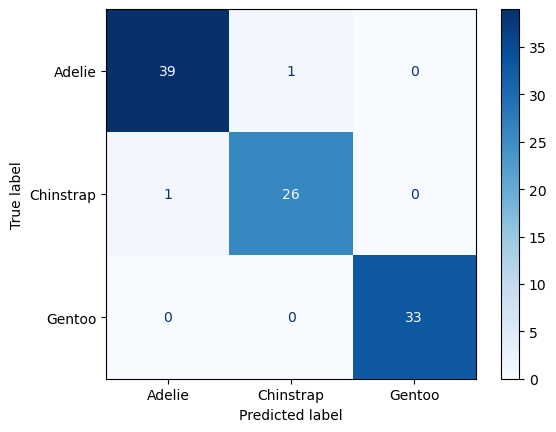

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
disp.plot(cmap = plt.cm.Blues)
plt.show()

##### 我們剛剛被一家隧道鑽孔公司聘請，該公司使用X射線嘗試了解岩石密度，理想情況下，這將允許他們在鑽探設備之前更換鑽頭，從而提高效率！他們給我們提供了一些實驗室測試結果，這些結果顯示了不同岩石密度類型測試時傳感器返回的信號強度（以nHz為單位）。

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("./rock_density_xray.csv")
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<Axes: xlabel='Signal', ylabel='Density'>

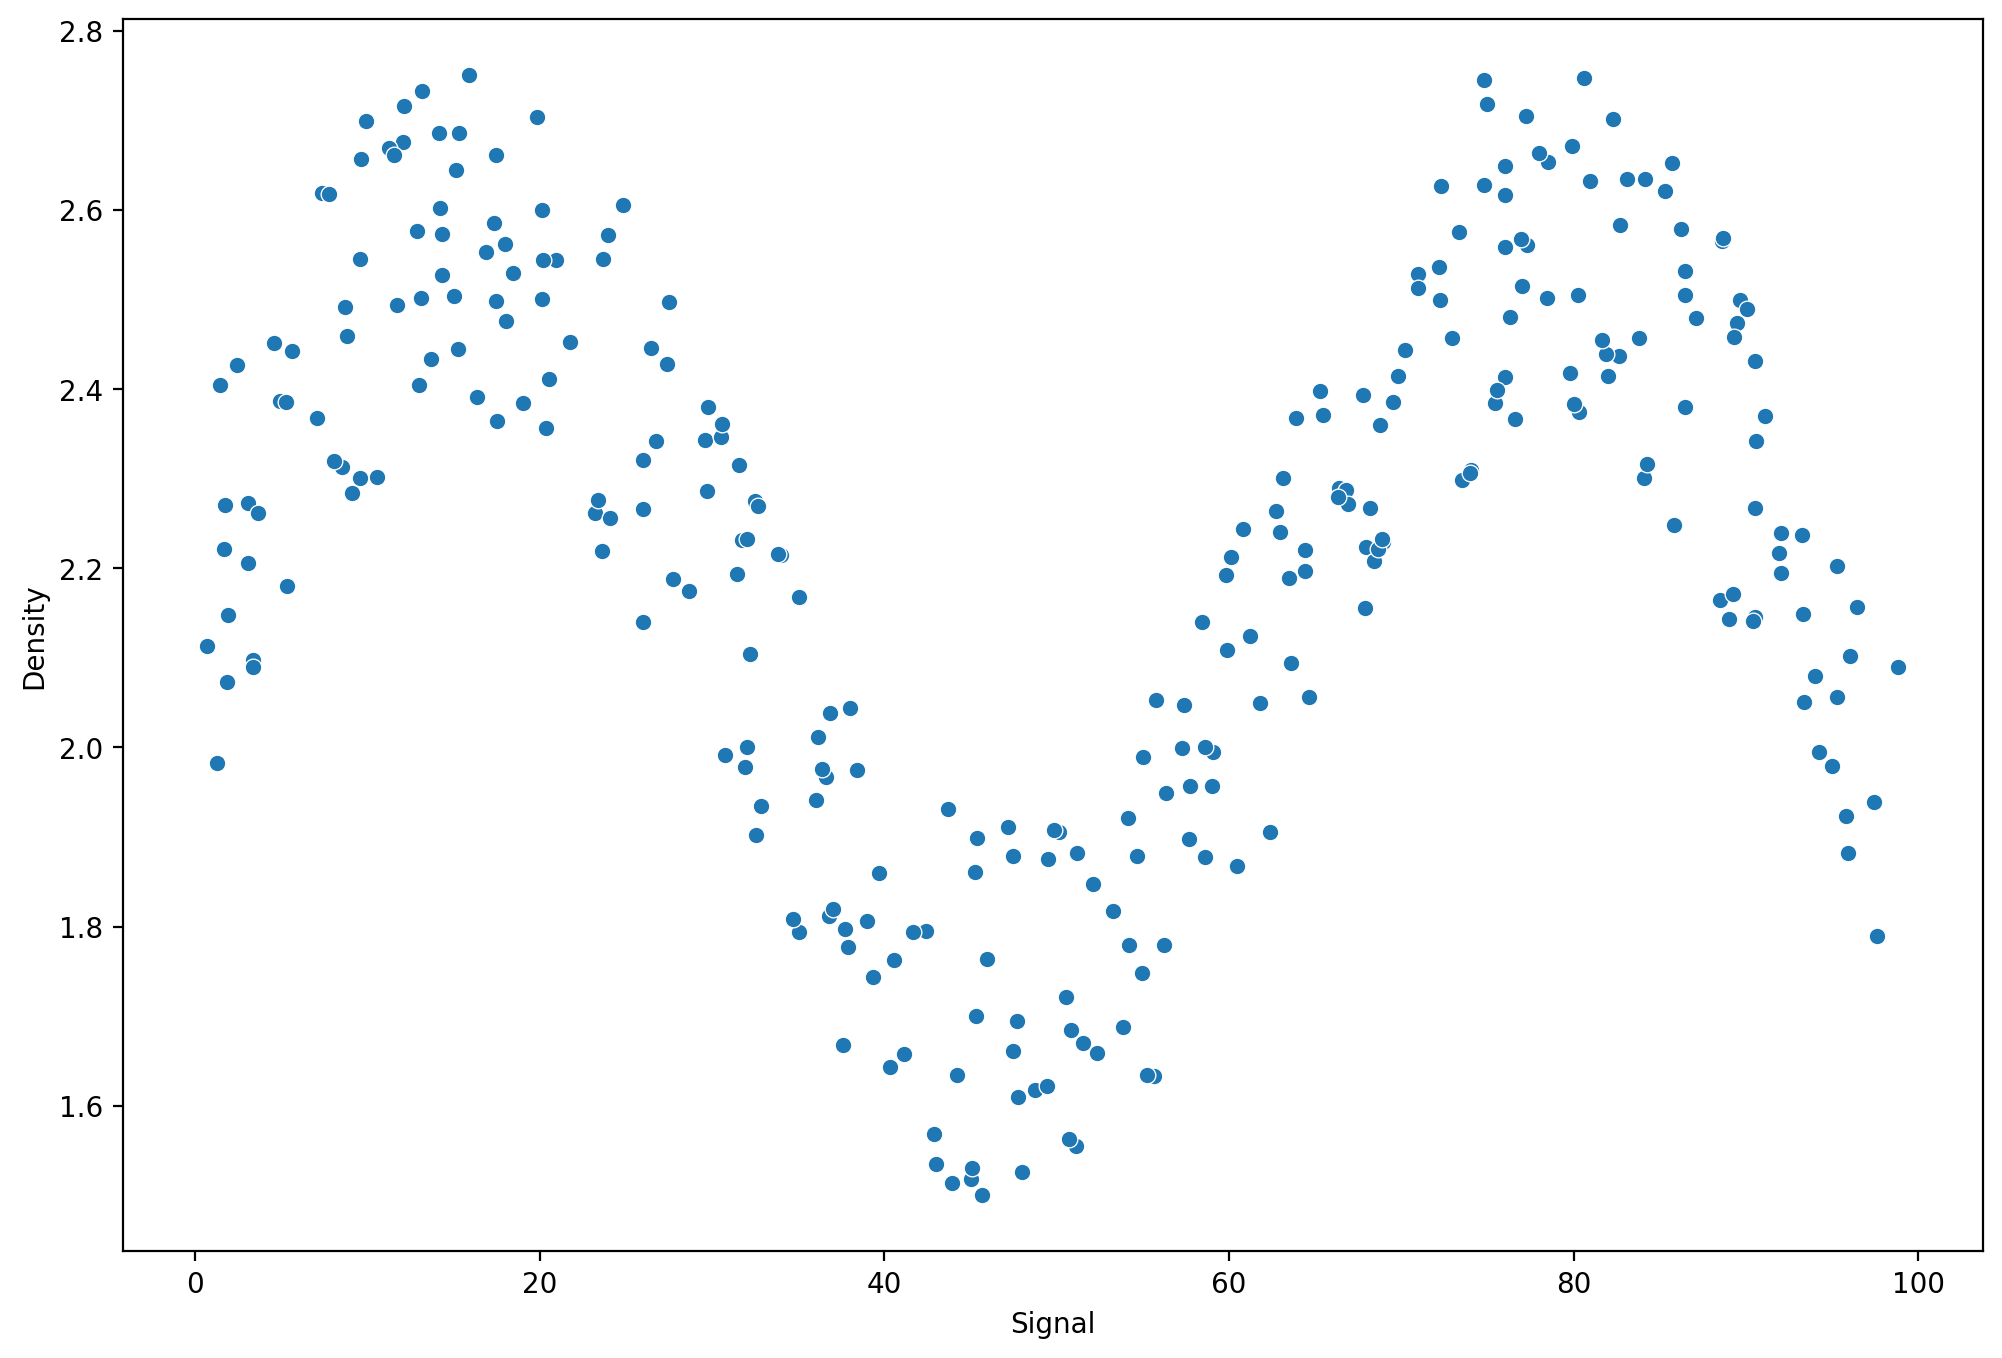

In [30]:
df.columns = ['Signal','Density']
plt.figure(figsize = (12,8), dpi = 200)
sns.scatterplot(x='Signal', y='Density', data = df)

In [31]:
from sklearn.model_selection import train_test_split
X = df['Signal'].values.reshape(-1,1)  
y = df['Density']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

In [32]:
from sklearn.metrics import mean_squared_error
def run_model(model, X_train, y_train, X_test, y_test):
    # Fit Model
    model.fit(X_train, y_train)
    
    # Get Metrics
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    plt.figure(figsize = (12,6), dpi = 150)
    sns.scatterplot(x='Signal', y='Density', data = df, color='black')
    plt.plot(signal_range, output)

RMSE : 0.13539082785895518


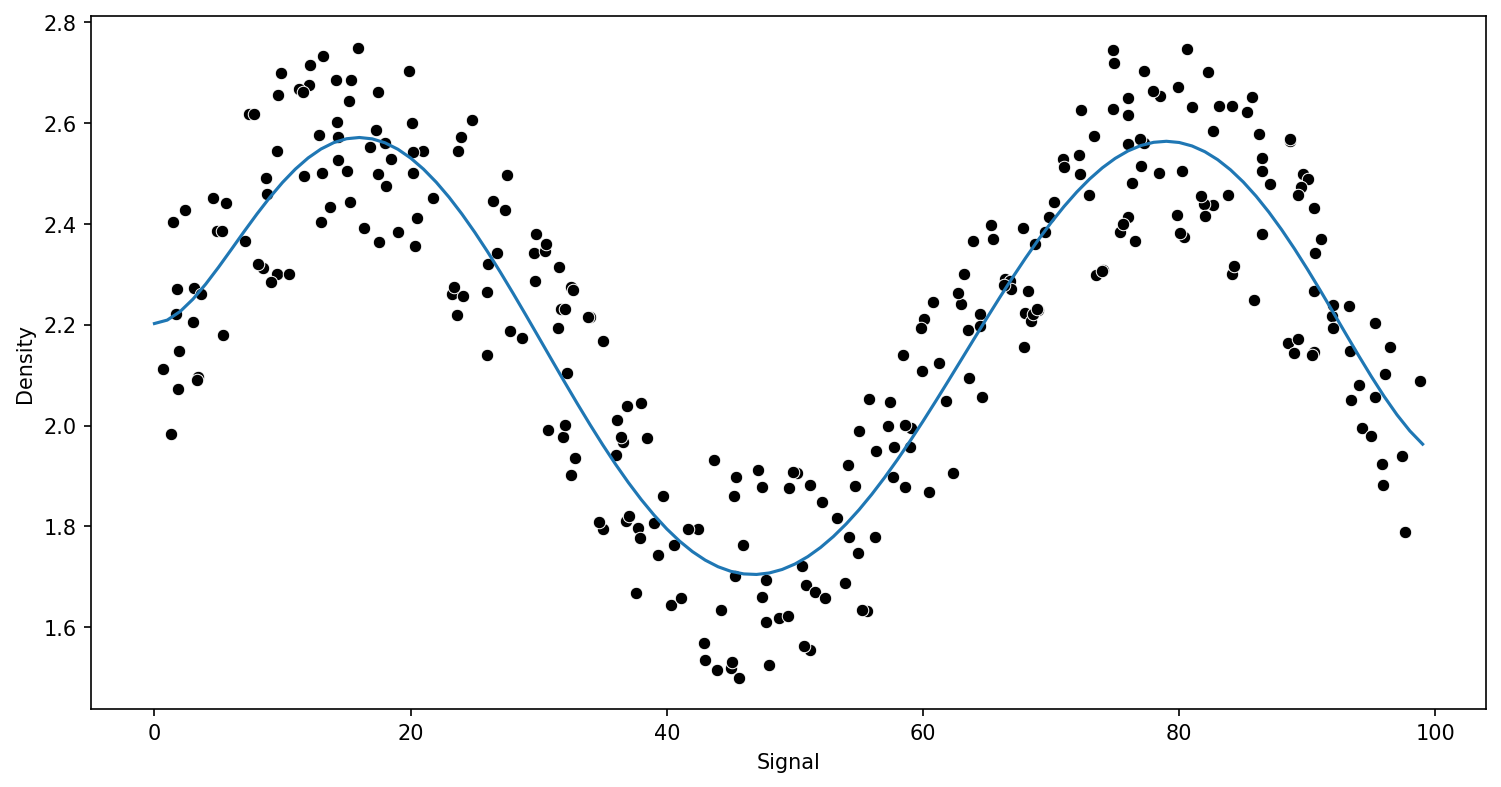

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures  # 多項式
pipe = make_pipeline(PolynomialFeatures(8), LinearRegression())
run_model(pipe, X_train, y_train, X_test, y_test)

RMSE : 0.1523487028635337


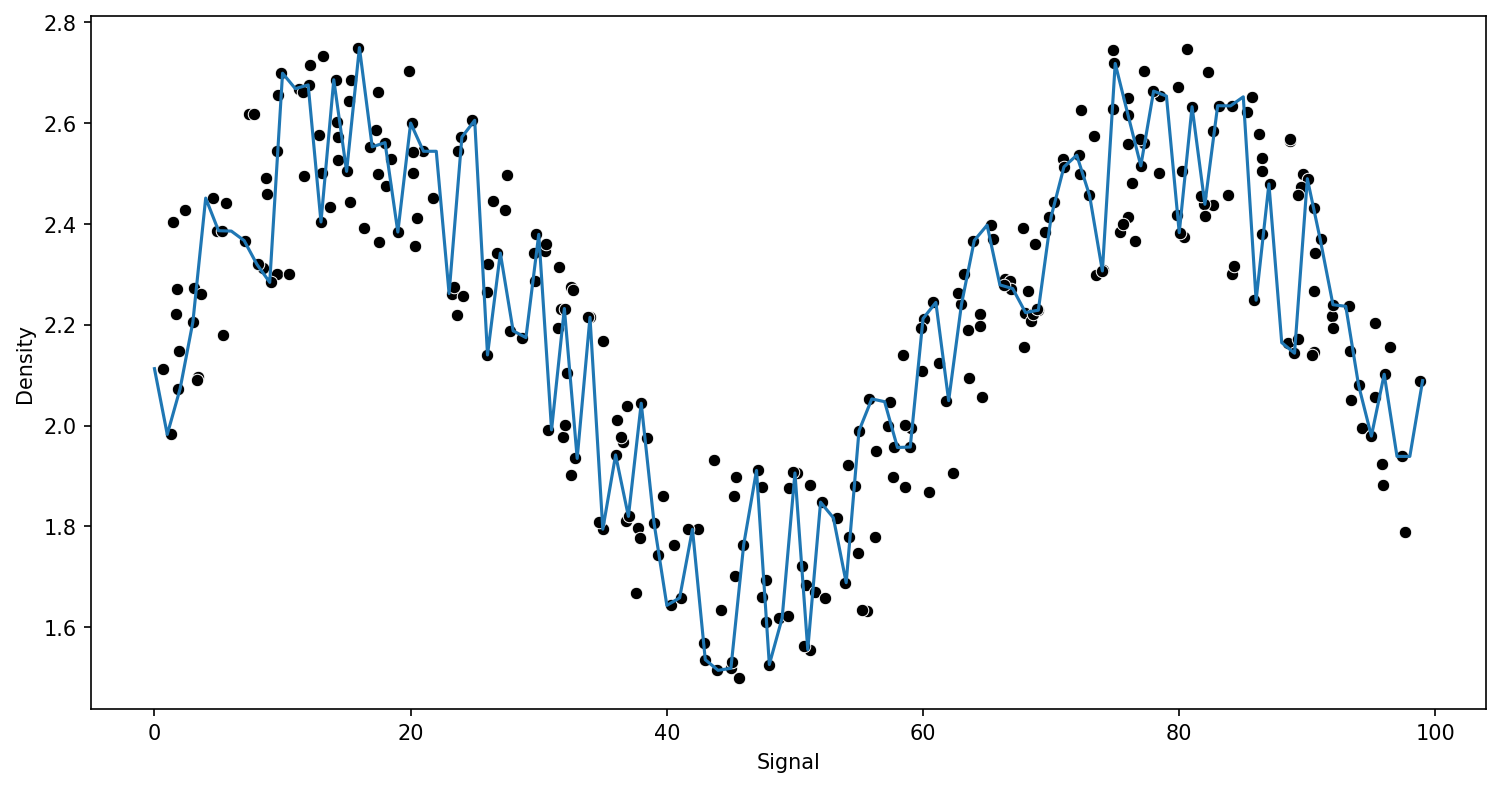

In [34]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

RMSE : 0.14405661837500455
RMSE : 0.1364327191392867
RMSE : 0.136286677358425


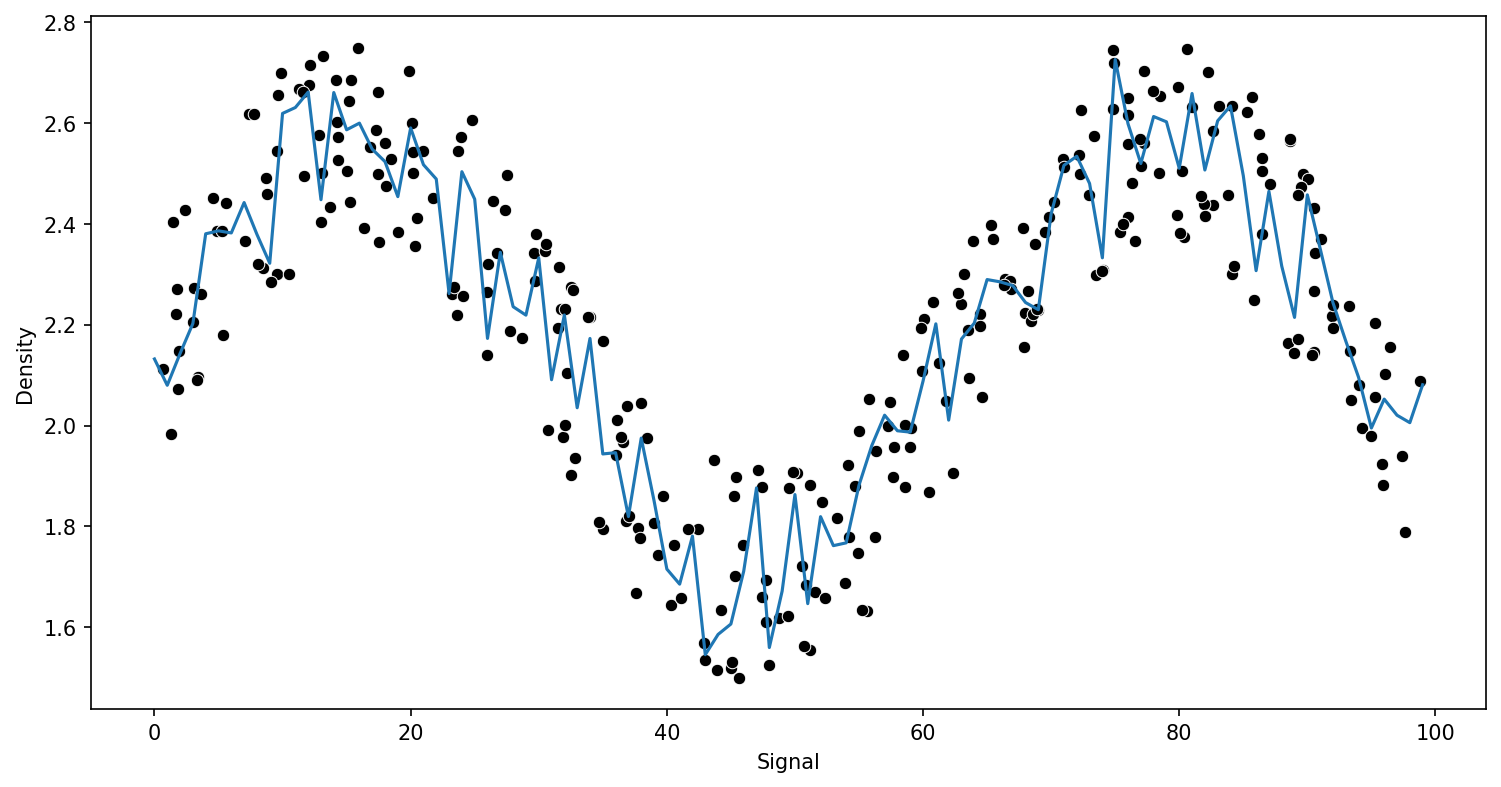

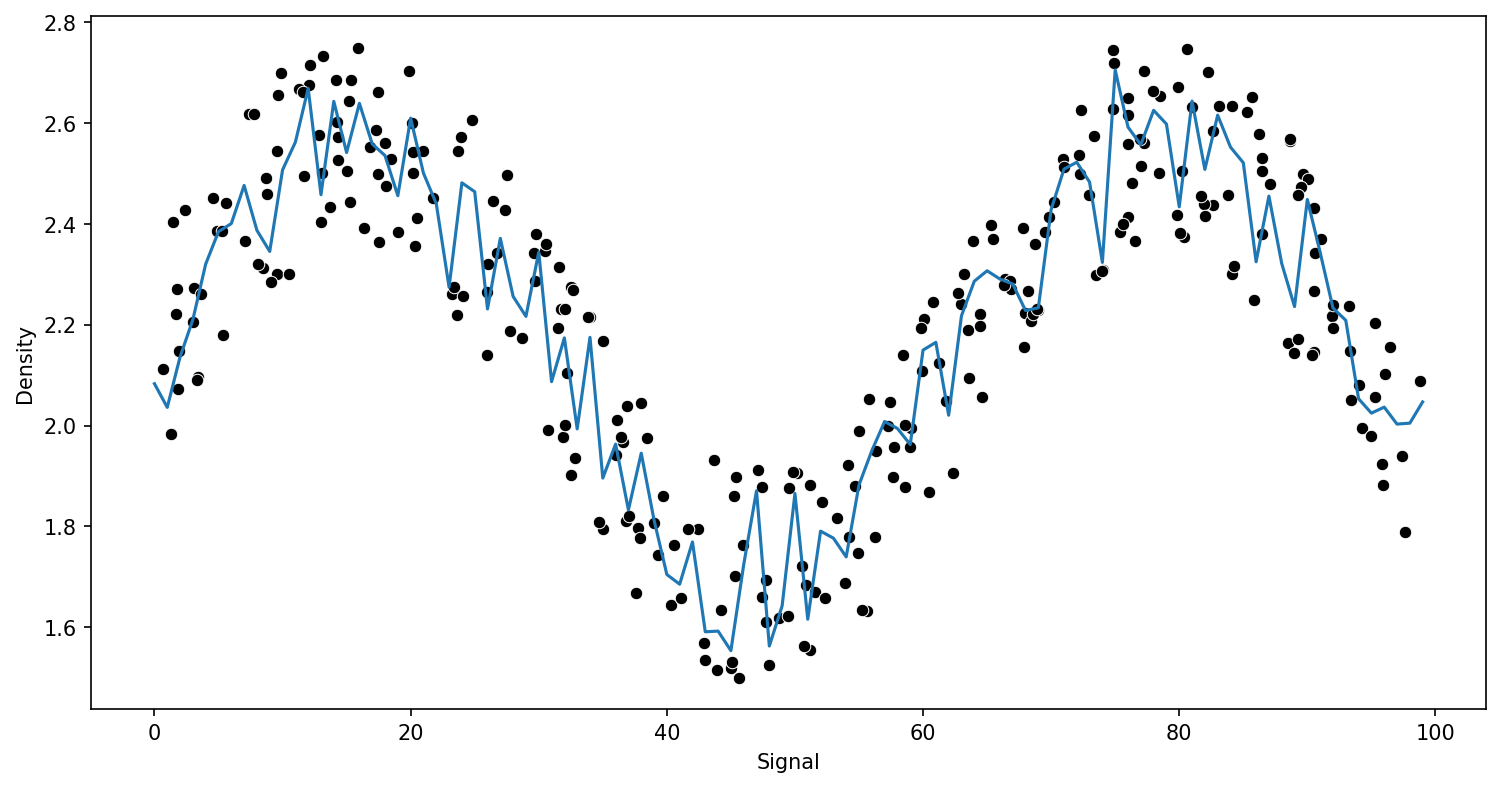

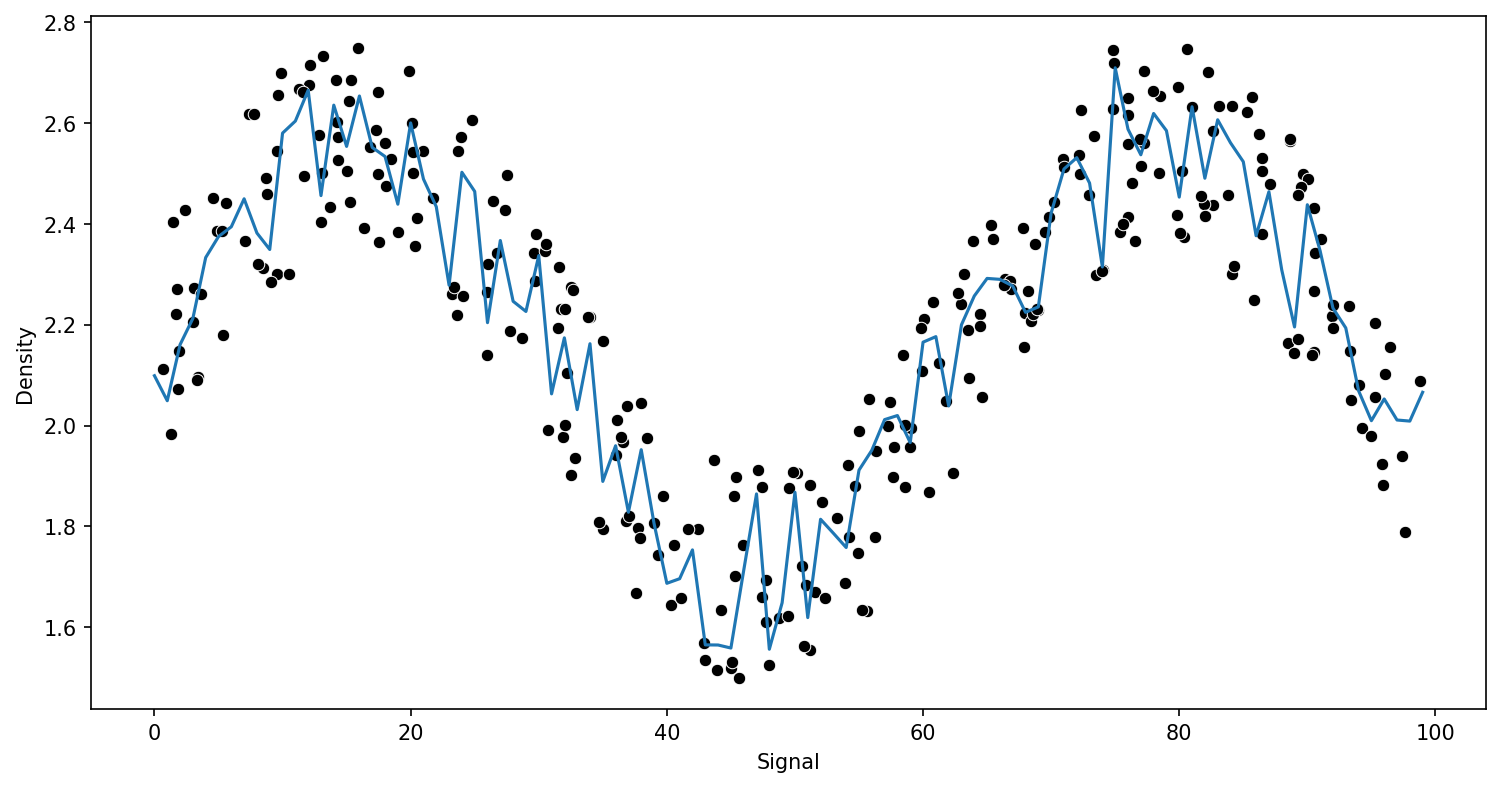

In [35]:
from sklearn.ensemble import RandomForestRegressor
trees = [10,50,100]
for n in trees:
    model = RandomForestRegressor(n_estimators = n)
    run_model(model, X_train, y_train, X_test, y_test)

# 4. Kmeans

In [36]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [37]:
import numpy as np
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 150, n_features = 2, centers = 3, cluster_std = 0.5, shuffle = True, random_state = 0)
# 150筆資料、2個特徵、分成3群、標準差：0.5、shuffle：是否重新洗牌

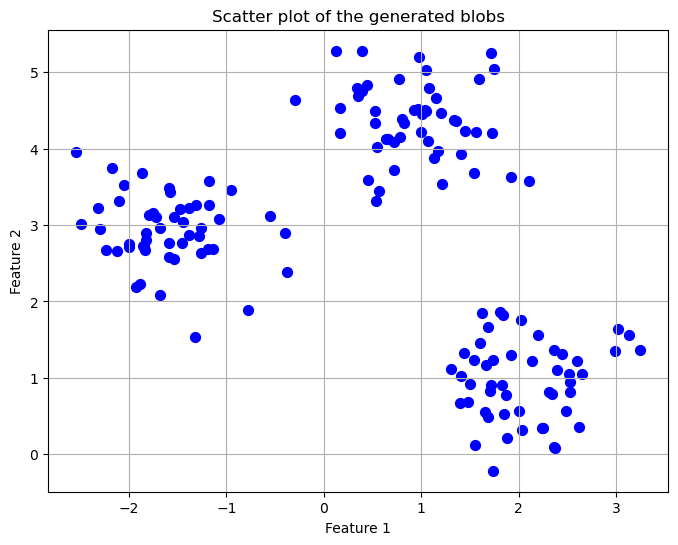

In [38]:
import matplotlib.pyplot as plt
# 繪製散佈圖
plt.figure(figsize = (8,6))
plt.scatter(X[:,0], X[:,1], c='blue', marker='o', s = 50)
plt.title("Scatter plot of the generated blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

# 5. init


random：隨機指定質心。

k-means++：依樣本點與既有質心的距離平方和(inertia_)，愈遠的樣本點愈有機會被選擇為下一個質心。

## n_init='auto'：

且init = 'k-means++'時 n_init = 1，表 k-means++ 只執行一次。

且init = ‘random’時 n_init = 10，表執行隨機指定質心10次，選擇其中最好的一次。

In [39]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2, init='k-means++', max_iter = 300, random_state = 0)

c:\Users\hankc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


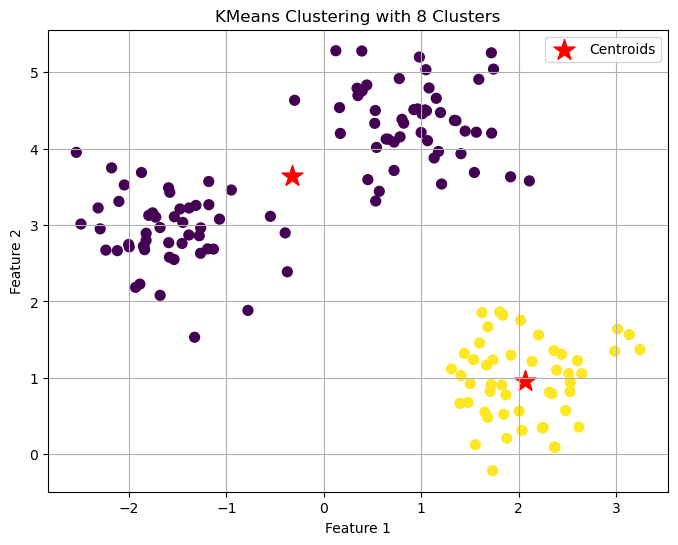

In [40]:
# 執行聚類並取得分組結果
y_km = km.fit_predict(X)

# 繪製聚類結果的散佈圖
plt.figure(figsize = (8,6))
plt.scatter(X[:,0], X[:,1], c = y_km, marker='o', s = 50, cmap='viridis')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 250, marker='*', c='red', label='Centroids')
plt.title("KMeans Clustering with 8 Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

In [41]:
# 顯示失真(Distortion)的程度，越小越好，這個值越小表示分群效果越好，因為這意味著資料點與其群組中心之間的距離較小，群組內的凝聚力較高。
y_km = km.fit_predict(X)                  
print('Distortion: %.2f' % km.inertia_)

Distortion: 283.46


c:\Users\hankc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# 6. 繪製輪廓圖與輪廓分數 (Silhouette Score)

是一種衡量分群質量的指標，範圍在 -1 到 1 之間。其分數反映了資料點在分群中的適合程度：

- **接近 1**：表示資料點非常適合當前的群組，且與其他群組的資料點有明顯的距離。這表示該資料點與其分群的相似性高，與其他群組的相似性低，分群效果理想。
  
- **接近 0**：表示資料點位於兩個群組的邊界，可能不適合任何群組或有可能被分到不同的群組。這種情況下，分群效果不明顯，可能需要重新調整分群方法或群數。
  
- **接近 -1**：表示資料點更適合其他群組，而不是當前的群組，這是分群質量差的指標。

因此，**輪廓分數愈接近 1 愈好**，因為這表示資料點明顯屬於某一群組，且與其他群組的資料點有較大的區別，分群的效果較好。這通常是優秀分群模型的特徵。

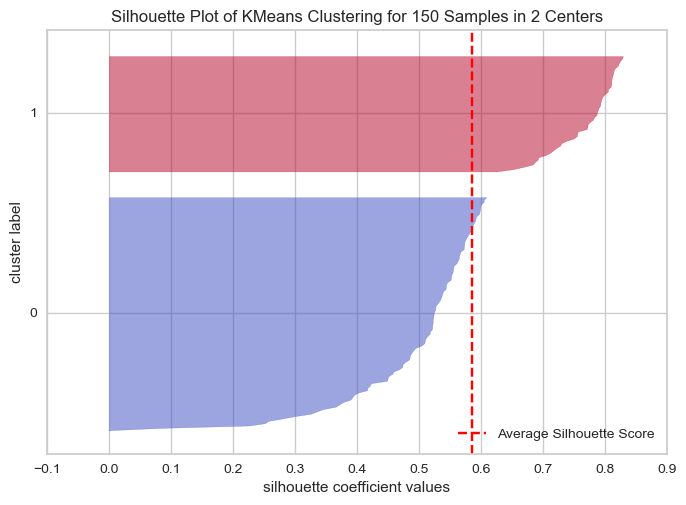

Silhouette Average: 0.58


In [42]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
visualizer = SilhouetteVisualizer(km, colors='coolwarm')
visualizer.fit(X)
visualizer.show()
silhouette_avg = silhouette_score(X, km.labels_)
print(f'Silhouette Average: {silhouette_avg:.2f}')

# 7. 轉折判斷法(Elbow)

In [43]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters = i, init='k-means++', max_iter = 300, random_state = 0)
    km.fit(X)
    # km.inertia_ 所有點到它們所屬群中心的距離平方總和(Sum of Squared Distances, SSD)
    # Inertia 越小越好
    distortions.append(km.inertia_)

c:\Users\hankc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hankc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hankc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hankc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

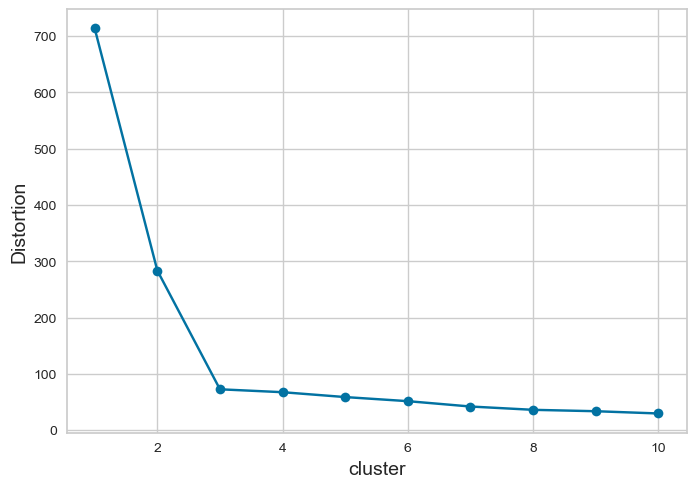

In [44]:
import matplotlib.pyplot as plt
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('cluster', fontsize = 14)
plt.ylabel('Distortion', fontsize = 14); # 失真

In [45]:
km = KMeans(n_clusters = 3, init='k-means++', max_iter = 300, random_state = 0)

c:\Users\hankc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


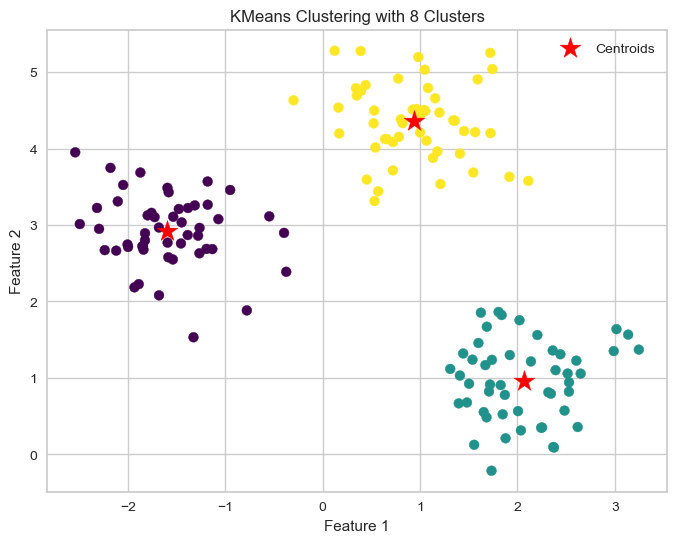

In [46]:
# 執行聚類並取得分組結果
y_km = km.fit_predict(X)

# 繪製聚類結果的散佈圖
plt.figure(figsize = (8,6))
plt.scatter(X[:,0], X[:,1], c = y_km, marker='o', s = 50, cmap='viridis')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 250, marker='*', c='red', label='Centroids')
plt.title("KMeans Clustering with 8 Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

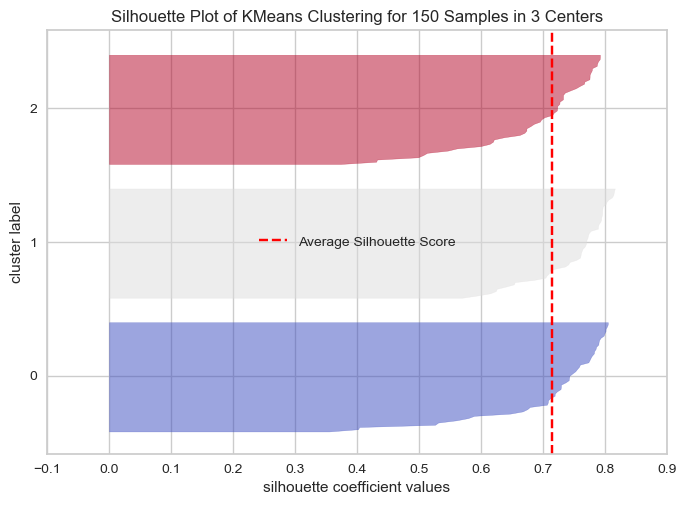

Silhouette Average: 0.71


In [47]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
visualizer = SilhouetteVisualizer(km, colors='coolwarm')
visualizer.fit(X)
visualizer.show()
silhouette_avg = silhouette_score(X, km.labels_)
print(f'Silhouette Average: {silhouette_avg:.2f}')